# Coupled Hawkes processes

We are going to sudy two Hawkes processes coupled, an excitatory and an inhibitory one. We are going to consider auto-excitation and interaction between them but auto-inhibition is considered negligible.

In general, we have a 4 dimensional parameter space $[n_{EE}, n_{EI}, n_{IE}, n_{II}]$, but we are going to fix $n_{II}=0$ and $n_{EE}=n_{EI}=1.5$ (supercritical). We will take two values of inhibition which produce different signals and study their phase diagram, normalized susceptibility and avalanche statistics (just for the case of $\mu\ll 1$).

The backgroud rates for excitation and inhibition will be the same $\mu_E=\mu_I=10^{-2}$

First, we are going to study a "critical" signal with $n_{IE}=-0.33$, where an exponential growth is regulated by inhibition. Secondly, we are going to increase the value of $n_{IE}$ to $0.5$ obtaining a "stationary signal".

In [1]:
from funciones import * 
import matplotlib.pyplot as plt

In [5]:
muE = muI = 10**-2
nEE = 1.5   
nEI = 1.5   
nIE = -0.33 
nII = 0. 
K = 10**6

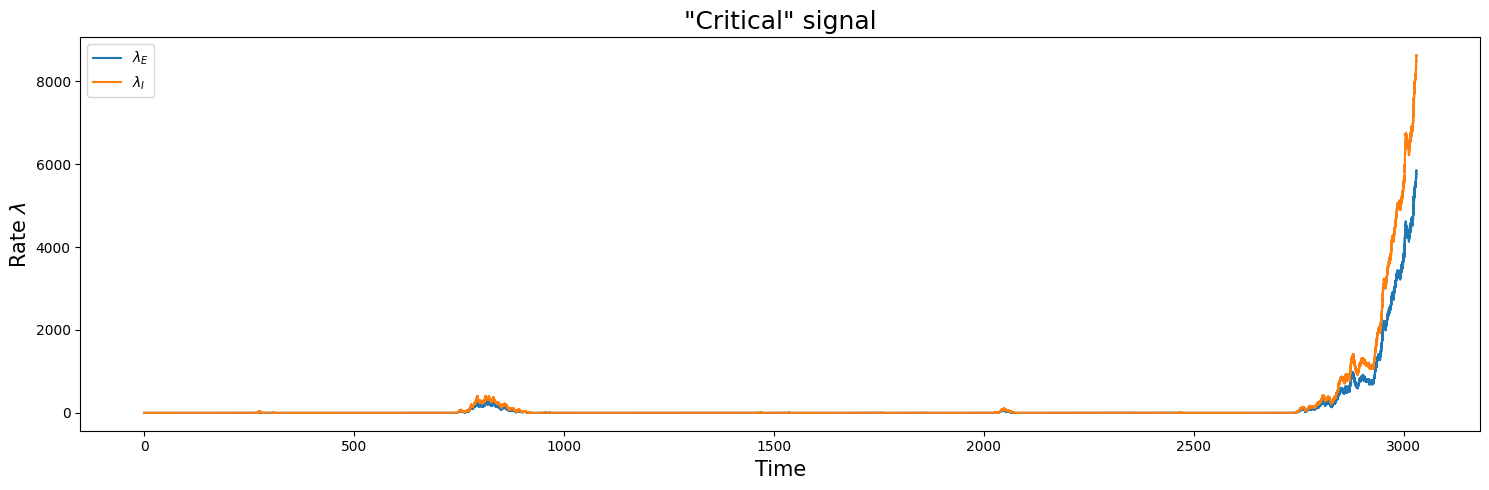

In [6]:
times_between_events, times, rate1, rate2, reactions = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
plt.figure(figsize=(15,5))
plt.plot(times, rate1, label='$\lambda_E$')
plt.plot(times, rate2, label='$\lambda_I$')
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Rate $\lambda$', fontsize = 15)
plt.title('"Critical" signal', fontsize = 18)
plt.legend()
plt.tight_layout()

# Phase diagram

As we have done with an isolated Hawkes processes, for the phase diagram, we will consider 3 configurations ($\mu_E=\mu_I=\mu$)
- First configuration (Poisson): $\mu=1$ $n_{i,j}=0\: \forall i,j$
- Second configuration ($\mu\ll 1$) and $n_{EE}=n_{EI}=1.5$, $n_{IE}=-0.33$ and $n_{II}=0$ 
- Second configuration ($\mu\gg 1$) and $n_{EE}=n_{EI}=1.5$, $n_{IE}=-0.33$ and $n_{II}=0$

In [7]:
mu_E=mu_I = 10**-2
titles = ['First configuration (Poisson)', 'Second configuration ($\mu=10^{-2}$)', 'Third configuration ($\mu=10^2$)']
labels = ['K$=10^3$', 'K$=10^4$', 'K$=10^5$']

deltas = [np.logspace(-1, 2, 100), np.logspace(-5, 1, 100), np.logspace(-5, 0, 100)]
percolation_mean_0 = [np.load(f'./data/percolation mean bivariate critical plot 0 K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolation_mean_1 = [np.load(f'./data/percolation mean bivariate critical plot 1 K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolation_mean_2 = [np.load(f'./data/percolation mean bivariate critical plot 2 K={K}.npy') for K in [10**3, 10**4, 10**5]]

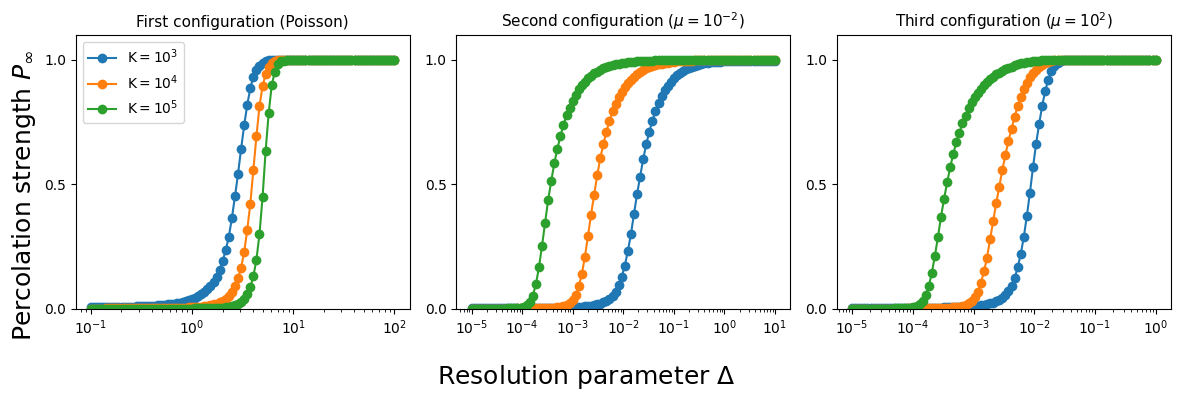

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].plot(deltas[0], percolation_mean_0[i], marker = 'o', label=labels[i])
    fig.axes[1].plot(deltas[1], percolation_mean_1[i], marker = 'o', label=labels[i])
    fig.axes[2].plot(deltas[2], percolation_mean_2[i], marker = 'o', label=labels[i])

fig.axes[0].legend(loc = 'upper left')

for ax in axs:
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)
    ax.set_yticks([0, 0.5, 1])
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)


fig.supylabel('Percolation strength $P_{\infty}$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()

As we can see, we have only one phase transition, which leads us to believe that the exponents of the statistics will be $\alpha=\tau=2$ such as 1D percolation.

## $\chi$

In [9]:
percolation_sus_0 = [np.load(f'./data/percolation sus bivariate critical plot 0 K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolation_sus_1 = [np.load(f'./data/percolation sus bivariate critical plot 1 K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolation_sus_2 = [np.load(f'./data/percolation sus bivariate critical plot 2 K={K}.npy') for K in [10**3, 10**4, 10**5]]

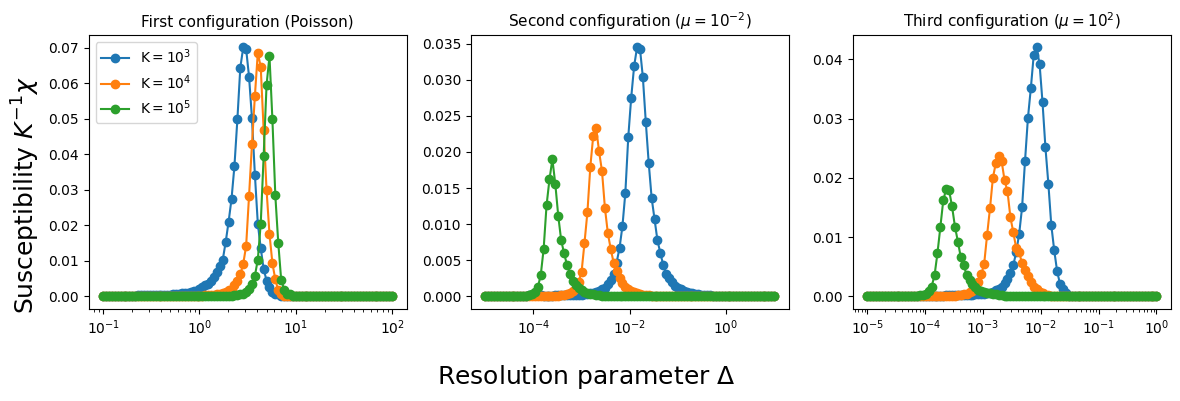

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].plot(deltas[0], percolation_sus_0[i], marker = 'o', label=labels[i])
    fig.axes[1].plot(deltas[1], percolation_sus_1[i], marker = 'o', label=labels[i])
    fig.axes[2].plot(deltas[2], percolation_sus_2[i], marker = 'o', label=labels[i])

fig.axes[0].legend(loc = 'upper left')

for ax in axs:
    ax.set_xscale('log')
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)


fig.supylabel('Susceptibility $K^{-1}\chi$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()

## Stats

In [11]:
deltas = np.logspace(-3, 1, num = 5) 
sbins = np.logspace(0, 5, 30)
tbins = np.load(f'./data/Bivariate critical tbins.npy')
sizes = [np.load(f'./data/Sizes bivariate critical Delta = {delta}.npy') for delta in deltas]
times = [np.load(f'./data/Times bivariate critical Delta = {delta}.npy') for delta in deltas]
shist = [np.histogram(s, density = True, bins = sbins)[0] for s in sizes]
thist = [np.histogram(t, density = True, bins = tbins[i])[0] for i, t in enumerate(times)]

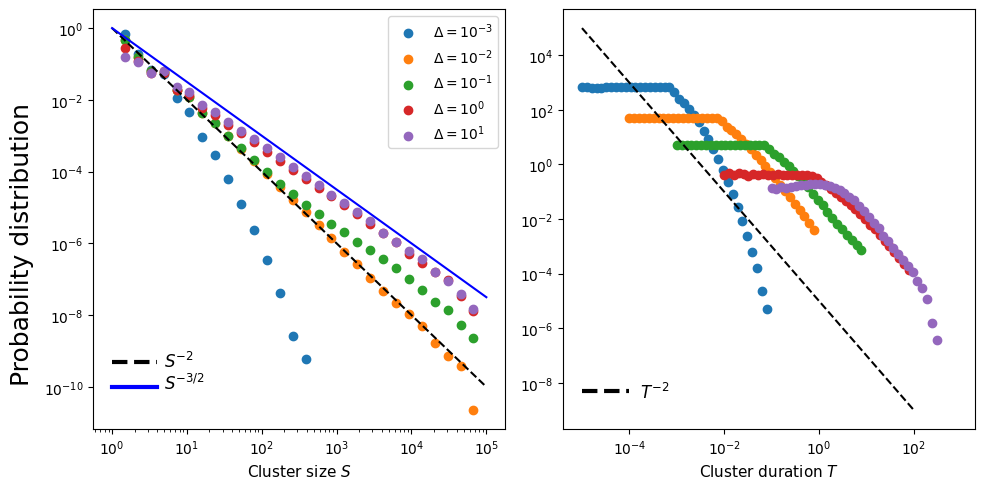

In [12]:
labels = [f'$\Delta = 10^{ {int(np.log10(delta))}}$' for delta in deltas]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i in range(len(deltas)):
    axes[0].scatter(sbins[:-1], shist[i], marker = 'o', label = labels[i])
    axes[1].scatter(tbins[i][:-1], thist[i], marker = 'o', label = labels[i])

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[0].set_xlabel('Cluster size $S$', fontsize = 11)
axes[1].set_xlabel('Cluster duration $T$', fontsize = 11)
axes[0].legend()
fig.supylabel('Probability distribution', fontsize = 18)

y_s = sbins**-2
y_s2 = sbins**(-3/2)
t_aux = np.logspace(-5, 2, 20)
y_t = t_aux**-2 * 10**-5

axes[0].plot(sbins, y_s, linestyle = '--', color = 'black', label = '$S^{-2}$')
axes[0].plot(sbins, y_s2, color = 'blue', label = '$S^{-3/2}$')
axes[1].plot(t_aux, y_t, linestyle = '--', color = 'black', label = '$T^{-2}$')

fig.axes[0].annotate('$S^{-2}$', xy=(3.2, 1.5E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*5E-10, color='black', linestyle='--', lw = 3)

fig.axes[0].annotate('$S^{-3/2}$', xy=(3.2, 0.35E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*1E-10, color='blue', linestyle='-', lw = 3)

fig.axes[1].annotate('$T^{-2}$', xy=(0.000085, 0.85E-9), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[1].plot(np.logspace(-5, -4, 10), np.ones(10)*5E-9, color='black', linestyle='--', lw = 3)


fig.tight_layout()

Contrary to what we thought, we have a transition of the size exponents as the case studied in the Notarmuzi article.

# "Stationary signal"

In [13]:
muE = muI = 10**-2
nEE = 1.5 
nEI = 1.5 
nIE = -0.5
nII = 0. 
K = 10**6

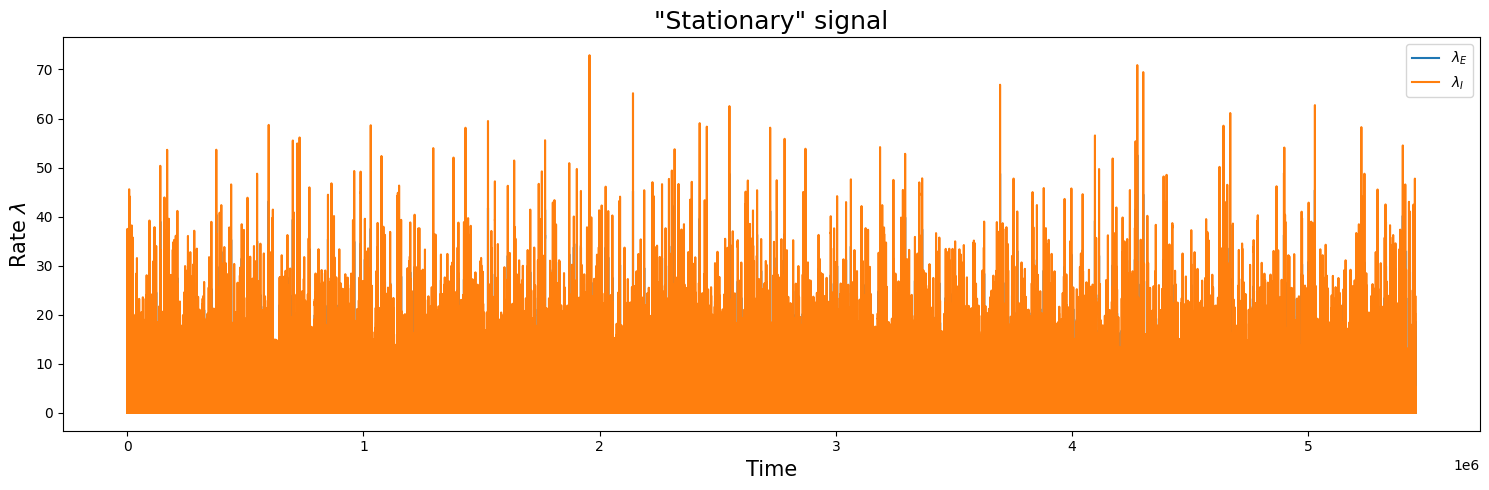

In [14]:
times_between_events, times, rate1, rate2, reactions = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
plt.figure(figsize=(15,5))
plt.plot(times, rate1, label='$\lambda_E$')
plt.plot(times, rate2, label='$\lambda_I$')
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Rate $\lambda$', fontsize = 15)
plt.title('"Stationary" signal', fontsize = 18)
plt.legend()
plt.tight_layout()

Here, we do not have an exponential growth but an stationary one.

In [15]:
deltas = [np.logspace(-1, 2, 100), np.logspace(-5, 1, 100), np.logspace(-5, 0, 100)]
percolation_mean_0 = [np.load(f'./data/percolation mean bivariate stationary plot 0 K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolation_mean_1 = [np.load(f'./data/percolation mean bivariate stationary plot 1 K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolation_mean_2 = [np.load(f'./data/percolation mean bivariate stationary plot 2 K={K}.npy') for K in [10**3, 10**4, 10**5]]

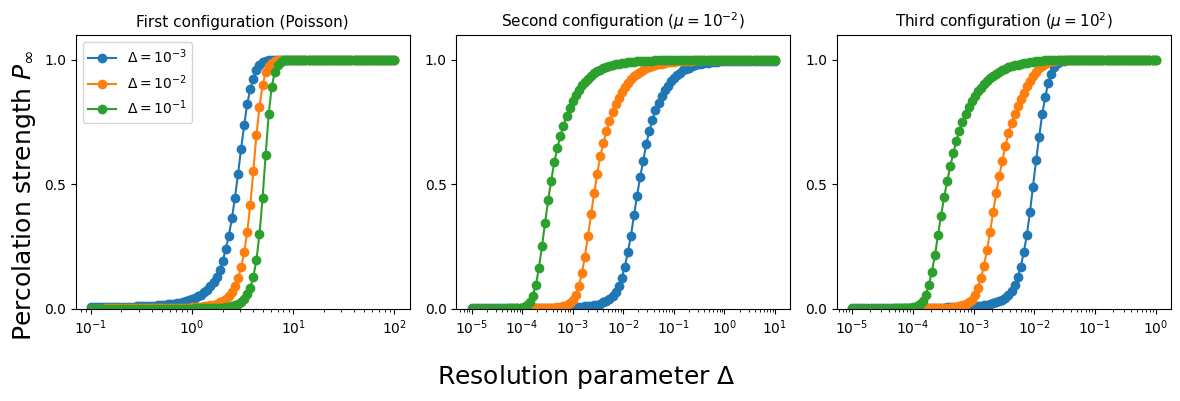

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].plot(deltas[0], percolation_mean_0[i], marker = 'o', label=labels[i])
    fig.axes[1].plot(deltas[1], percolation_mean_1[i], marker = 'o', label=labels[i])
    fig.axes[2].plot(deltas[2], percolation_mean_2[i], marker = 'o', label=labels[i])

fig.axes[0].legend(loc = 'upper left')

for ax in axs:
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)
    ax.set_yticks([0, 0.5, 1])
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)


fig.supylabel('Percolation strength $P_{\infty}$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()

As previously, we have just a single phase transition, therefore, we expect the exponents of 1D percolation.

## $\chi$

In [17]:
percolation_sus_0 = [np.load(f'./data/percolation sus bivariate stationary plot 0 K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolation_sus_1 = [np.load(f'./data/percolation sus bivariate stationary plot 1 K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolation_sus_2 = [np.load(f'./data/percolation sus bivariate stationary plot 2 K={K}.npy') for K in [10**3, 10**4, 10**5]]

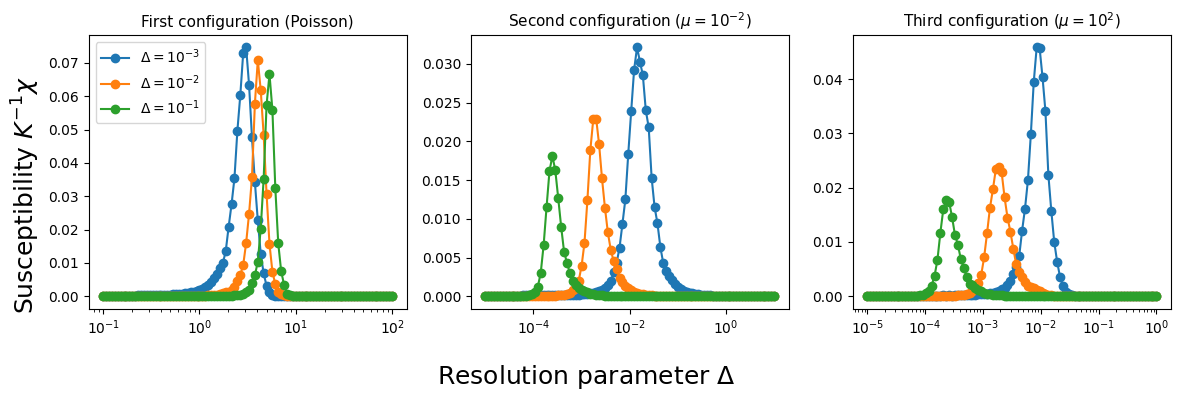

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].plot(deltas[0], percolation_sus_0[i], marker = 'o', label=labels[i])
    fig.axes[1].plot(deltas[1], percolation_sus_1[i], marker = 'o', label=labels[i])
    fig.axes[2].plot(deltas[2], percolation_sus_2[i], marker = 'o', label=labels[i])

fig.axes[0].legend(loc = 'upper left')

for ax in axs:
    ax.set_xscale('log')
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)


fig.supylabel('Susceptibility $K^{-1}\chi$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()

## Stats

In [19]:
sbins = np.logspace(0, 5, 30)
tbins = np.load(f'./data/Bivariate stationary tbins.npy')
# tbins = [tbins,np.logspace(np.log10(0.01*delta), np.log10(10*delta), num = 50, base = 10)] si al final metemos ese delta

In [20]:
deltas = np.logspace(-3, 1, num = 5) # Cambiar -3,2,-6 si metemos el último Delta
sizes = [np.load(f'./data/Sizes bivariate stationary Delta = {delta}.npy') for delta in deltas]
times = [np.load(f'./data/Times bivariate stationary Delta = {delta}.npy') for delta in deltas]
shist = [np.histogram(s, density = True, bins = sbins)[0] for s in sizes]
thist = [np.histogram(t, density = True, bins = tbins[i])[0] for i, t in enumerate(times)]

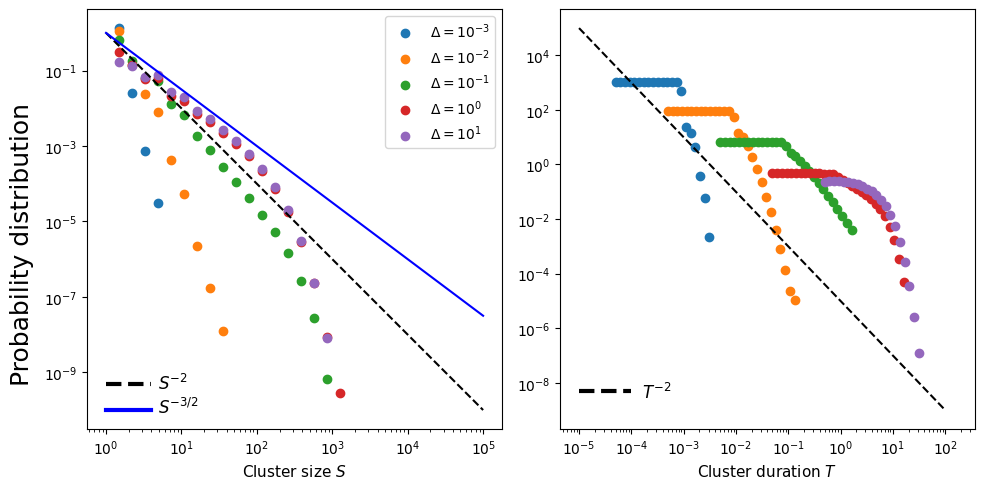

In [21]:
labels = [f'$\Delta = 10^{ {int(np.log10(delta))}}$' for delta in deltas]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i in range(len(deltas)):
    axes[0].scatter(sbins[:-1], shist[i], marker = 'o', label = labels[i])
    axes[1].scatter(tbins[i][:-1], thist[i], marker = 'o', label = labels[i])

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[0].set_xlabel('Cluster size $S$', fontsize = 11)
axes[1].set_xlabel('Cluster duration $T$', fontsize = 11)
axes[0].legend()
fig.supylabel('Probability distribution', fontsize = 18)

y_s = sbins**-2
y_s2 = sbins**(-3/2)
t_aux = np.logspace(-5, 2, 20)
y_t = t_aux**-2 * 10**-5

axes[0].plot(sbins, y_s, linestyle = '--', color = 'black', label = '$S^{-2}$')
axes[0].plot(sbins, y_s2, color = 'blue', label = '$S^{-3/2}$')
axes[1].plot(t_aux, y_t, linestyle = '--', color = 'black', label = '$T^{-2}$')

fig.axes[0].annotate('$S^{-2}$', xy=(3.2, 1.5E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*5E-10, color='black', linestyle='--', lw = 3)

fig.axes[0].annotate('$S^{-3/2}$', xy=(3.2, 0.35E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*1E-10, color='blue', linestyle='-', lw = 3)

fig.axes[1].annotate('$T^{-2}$', xy=(0.000085, 0.85E-9), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[1].plot(np.logspace(-5, -4, 10), np.ones(10)*5E-9, color='black', linestyle='--', lw = 3)


fig.tight_layout()

In this case, we have exponents similar to 1D percolation ones but with an exponential decrease cutoff.

Finally, a comparison between both signals, we will plot only $\lambda_I$ because it is the largest of them.

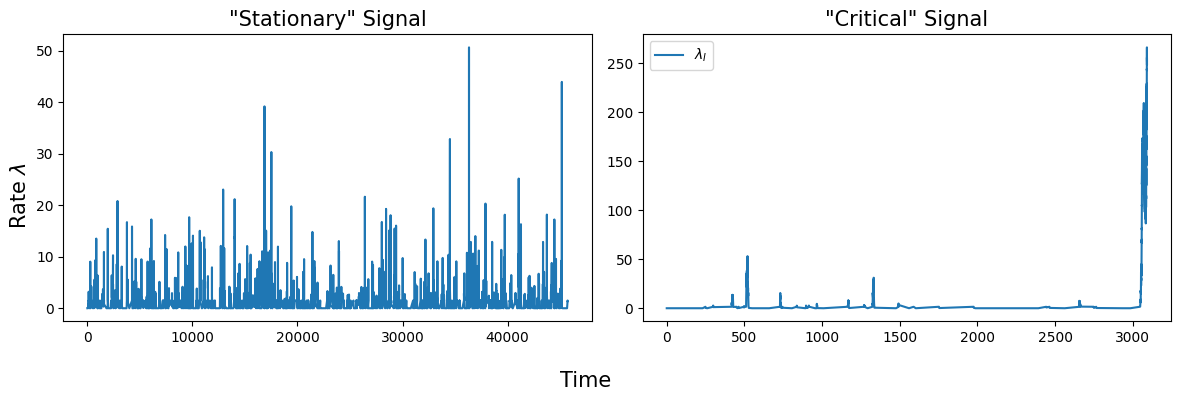

In [28]:
muE = muI = 10**-2
nEE = 1.5 
nEI = 1.5 
nII = 0. 
K = 10**4

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
nIE = -0.5
_, times, _, rate2, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
axes[0].plot(times, rate2, label='$\lambda_I$')
nIE = -0.33
_, times, _, rate2, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
axes[1].plot(times, rate2, label='$\lambda_I$')
fig.supxlabel('Time', fontsize = 15)
fig.supylabel('Rate $\lambda$', fontsize = 15)
axes[0].set_title('"Stationary" Signal', fontsize = 15)
axes[1].set_title('"Critical" Signal', fontsize = 15)
plt.legend()
plt.tight_layout()